In [1]:

import numpy as np
import pandas as pd



In [7]:
df = pd.read_csv("spam.csv", encoding='latin-1')

In [8]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1902,ham,My sister got placed in birla soft da:-),NaN,NaN,NaN
339,ham,U calling me right? Call my hand phone...,NaN,NaN,NaN
1010,ham,Lol I would but my mom would have a fit and te...,NaN,NaN,NaN
2360,ham,Had the money issue weigh me down but thanks t...,NaN,NaN,NaN
4463,ham,Ranjith cal drpd Deeraj and deepak 5min hold,NaN,NaN,NaN


In [10]:
df.shape

(5572, 5)

In [11]:
#STEPS TO BE DONE TO COMPLETE THE MODEL:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy


# 1. Data Cleaning

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [13]:
#dropping last 3 columns as they are null most of them
df.drop(columns=['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [14]:
df.sample(5)

,v1,v2
1120,ham,Cancel cheyyamo?and get some money back?
3126,ham,Thats cool. i liked your photos. You are very ...
1637,spam,"0A$NETWORKS allow companies to bill for SMS, s..."
2742,ham,No * am working on the ringing u thing but hav...
2219,spam,You have WON a guaranteed å£1000 cash or a å£2...


In [15]:
#changing the column name 1 and 2
df.rename(columns={'v1' : 'target', 'v2':'text'}, inplace=True)

In [16]:
df.sample(5)

,target,text
1132,ham,Good morning princess! How are you?
2689,ham,"Ya ok, vikky vl c witin &lt;#&gt; mins and il..."
4539,ham,"Urgh, coach hot, smells of chip fat! Thanks ag..."
296,ham,Unless it's a situation where YOU GO GURL woul...
3066,ham,Ok. So april. Cant wait


In [17]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [18]:
df['target'] = encoder.fit_transform(df['target'])

In [19]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
#checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [21]:
#checking duplicate values
df.duplicated().sum()

403

In [22]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [23]:
df.duplicated().sum()


0

In [24]:
df.shape

(5169, 2)

# 2. EDA

In [25]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

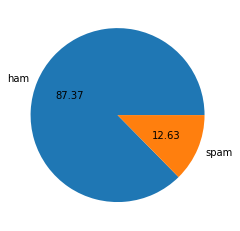

In [26]:
#for representation of counts
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [27]:
# Conclusion - data is imbalanced

In [28]:
import nltk

In [29]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [32]:
df['num_characters'] = df['text'].apply(len)

In [34]:
df.sample(5)

,target,text,num_characters
784,0,Dont think so. It turns off like randomlly wit...,65
2997,0,No b4 Thursday,14
617,0,For my family happiness..,25
3915,0,Ok. C u then.,13
2909,0,How do you guys go to see movies on your side.,46


In [41]:
#num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [38]:
df.sample(5)

,target,text,num_characters,num_words
5530,0,I think that tantrum's finished so yeah I'll b...,64,15
3375,0,"Good afternon, my love. How are today? I hope ...",151,34
5454,0,Im just wondering what your doing right now?,44,9
4719,0,Forgot to tell Ì_ smth.. Can Ì_ like number th...,79,18
885,0,Gibbs unsold.mike hussey,24,3


In [42]:
#num of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [43]:
df.sample(5)

,target,text,num_characters,num_words,num_sentences
4363,0,So what about you. What do you remember,39,9,2
4962,0,I want to see your pretty pussy...,34,8,1
1356,0,U ned to convince him tht its not possible wit...,81,16,1
1490,0,Cant believe i said so many things to you this...,172,38,3
2985,1,Reply to win å£100 weekly! What professional s...,107,21,3


In [44]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [45]:
#separately analyzing ham and spam
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [46]:
# spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [47]:
#plotting about everything done above(best method to do is seaborn(i prefer seaborn))
import seaborn as sns

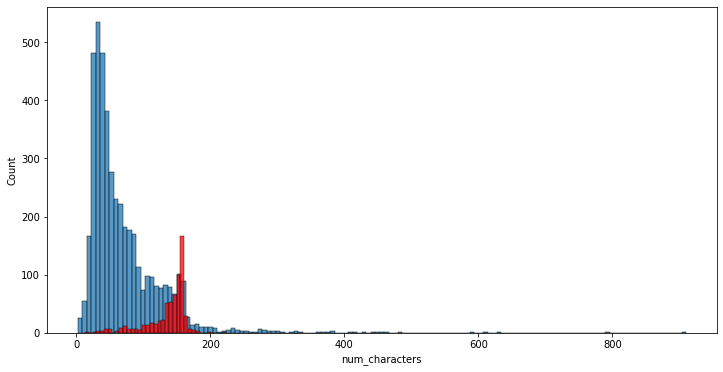

In [48]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')


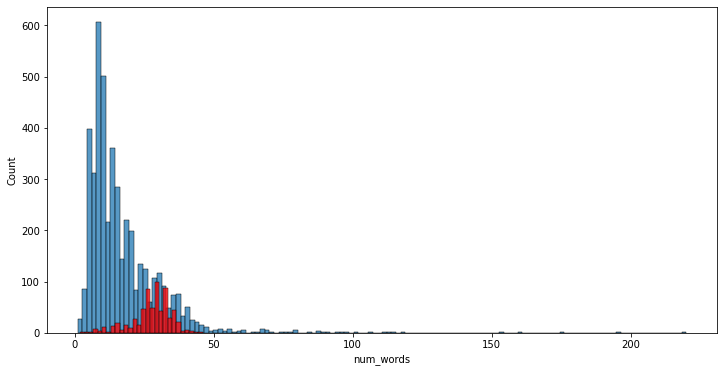

In [49]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

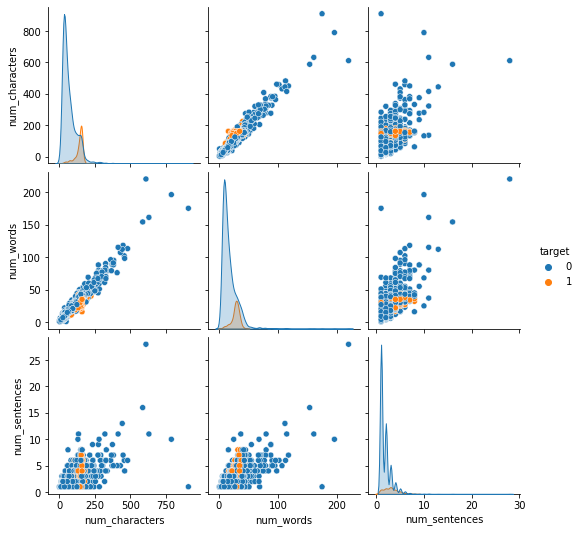

In [50]:
sns.pairplot(df,hue='target')

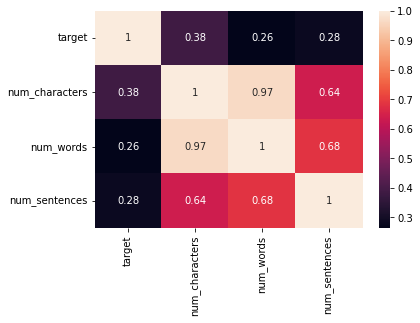

In [51]:
sns.heatmap(df.corr(),annot=True)

# 3. Data Preprocessing

*   STEPS:

*   Lower case
*   Tokenization
*   Removing special characters
*   Removing stop words and punctuation
*   Stemming







In [71]:
import string

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

In [78]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [82]:
def transform_text(text):
    text = text.lower()       #lower case the sentence
    text = nltk.word_tokenize(text)   #tokenize the sentence(converting the sentence into a list of words)
    
    y = []
    for i in text:
        if i.isalnum():                 #removing special characters
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:    #removing stopwords and punctuation
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)
    

In [79]:
ps.stem('loving')

'love'

In [85]:
transform_text('Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx')

'okay name ur price long legal wen pick u ave x am xx'

In [84]:
df['text'][100]

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [86]:
df['transformed_text'] = df['text'].apply(transform_text)

In [87]:
df.sample(5)

,target,text,num_characters,num_words,num_sentences,transformed_text
1242,0,Nobody can decide where to eat and dad wants C...,52,10,1,nobodi decid eat dad want chines
3807,0,Mm you ask him to come its enough :-),37,11,1,mm ask come enough
1022,0,We still on for tonight?,24,6,1,still tonight
2950,0,Hey now am free you can call me.,32,9,1,hey free call
415,0,Whatsup there. Dont u want to sleep,35,8,2,whatsup dont u want sleep


In [88]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')


In [89]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))


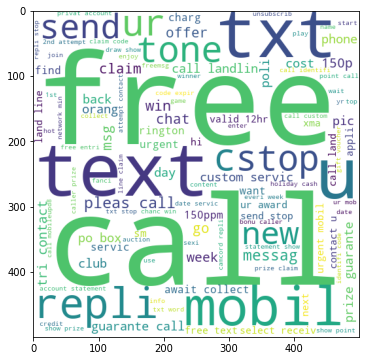

In [90]:
#displaying the spam words
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)


In [91]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))


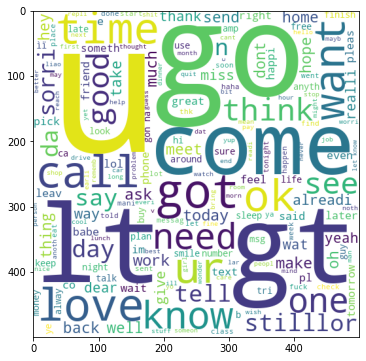

In [92]:
#displaying the ham words
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)


In [93]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [94]:
#top 30 words from spam

spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [95]:
len(spam_corpus)

9939

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


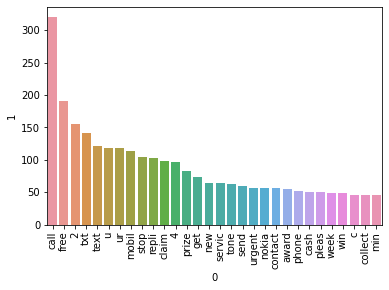

In [98]:
#plotting the most common 30 words of spam into bar
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


In [99]:
#top 30 words from ham


ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


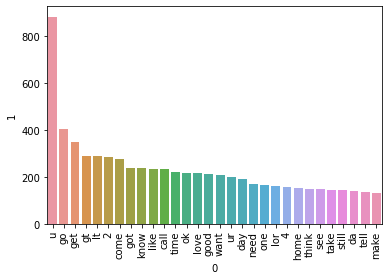

In [100]:
#plotting the most common 30 words of spam into bar
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


In [101]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4. Model Building

In [102]:
#Naive Bayes Algorithm used
#Text Vectorization
#Using Bag of words
#using tfidf
#using mnb(multinomial)

In [103]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)


In [116]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [117]:
X.shape

(5169, 3000)

In [118]:
y = df['target'].values

In [119]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [122]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [123]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [124]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [125]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [126]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [127]:
from sklearn.ensemble import StackingClassifier

In [129]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))